# EDA on childcare costs data

Objetive: Implement Exploratory Data Analysis tecniques (EDA) in order to getting insights from childcare costs database (alvailable in Kaggle: https://www.kaggle.com/datasets/sujaykapadnis/childcare-costs).


In [123]:
#import libaries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets

pd.set_option('display.max_columns', None)

## Data Reading

We will work with 3 datasets:

* childcare_costs.csv: dataset with information about unemployment, childcare and poverty per county.
* counties.csv: dataset with counties data such as name and state.
* childcare_dictionary: dataset built from Kaggle's website table (https://www.kaggle.com/datasets/sujaykapadnis/childcare-costs)

In [124]:
#Read data
df_costs = pd.read_csv('childcare_costs.csv')
df_county = pd.read_csv('counties.csv')
costs_dict = pd.read_csv('childcare_dictionary.csv', sep=';', on_bad_lines='skip')

print("Shapes of data (rows, columns):\n\n1. childcare_costs:", df_costs.shape, "\n2. counties:", df_county.shape, "\n3. dict:", costs_dict.shape)

Shapes of data (rows, columns):

1. childcare_costs: (34567, 61) 
2. counties: (3144, 4) 
3. dict: (61, 3)


## Check datatypes

In [125]:
#We have 61 columns: 51 float and 10 int64 (as expected from source metadata)
#Also we can see some columns with null data
print(df_costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   county_fips_code           34567 non-null  int64  
 1   study_year                 34567 non-null  int64  
 2   unr_16                     34567 non-null  float64
 3   funr_16                    34567 non-null  float64
 4   munr_16                    34567 non-null  float64
 5   unr_20to64                 34567 non-null  float64
 6   funr_20to64                34567 non-null  float64
 7   munr_20to64                34567 non-null  float64
 8   flfpr_20to64               34567 non-null  float64
 9   flfpr_20to64_under6        34567 non-null  float64
 10  flfpr_20to64_6to17         34567 non-null  float64
 11  flfpr_20to64_under6_6to17  34567 non-null  float64
 12  mlfpr_20to64               34567 non-null  float64
 13  pr_f                       34567 non-null  flo

In [126]:
#Here we have an ID and county data with non-null data
print(df_county.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   county_fips_code    3144 non-null   int64 
 1   county_name         3144 non-null   object
 2   state_name          3144 non-null   object
 3   state_abbreviation  3144 non-null   object
dtypes: int64(1), object(3)
memory usage: 98.4+ KB
None


In [127]:
#Check data head (we can see all columns because of pd.set_option('display.max_columns', None) row at the begining)
print("\n\nchildcare_costs:\n\n")
df_costs.head()



childcare_costs:




,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,flfpr_20to64_6to17,flfpr_20to64_under6_6to17,mlfpr_20to64,pr_f,pr_p,mhi_2018,me_2018,fme_2018,mme_2018,total_pop,one_race,one_race_w,one_race_b,one_race_i,one_race_a,one_race_h,one_race_other,two_races,hispanic,households,h_under6_both_work,h_under6_f_work,h_under6_m_work,h_under6_single_m,h_6to17_both_work,h_6to17_fwork,h_6to17_mwork,h_6to17_single_m,emp_m,memp_m,femp_m,emp_service,memp_service,femp_service,emp_sales,memp_sales,femp_sales,emp_n,memp_n,femp_n,emp_p,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,79.59,60.81,84.0,8.5,11.5,58462.55,32710.60,25156.25,41436.80,49744,98.1,78.9,17.7,0.4,0.4,0.0,0.7,1.9,1.8,18373,1543,970,22,995.0,4900,1308,114,1966.0,27.40,24.41,30.68,17.06,15.53,18.75,29.11,15.97,43.52,13.21,22.54,2.99,13.22,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,78.41,59.91,86.2,7.5,10.3,60211.71,34688.16,26852.67,43865.64,49584,98.6,79.1,17.9,0.4,0.6,0.0,0.7,1.4,2.0,18288,1475,964,16,1099.0,5028,1519,92,2305.0,29.54,26.07,33.40,15.81,14.16,17.64,28.75,17.51,41.25,11.89,20.30,2.52,14.02,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,78.15,59.71,85.8,7.5,10.6,61775.80,34740.84,27391.08,46155.24,53155,98.5,79.1,17.9,0.3,0.7,0.0,0.6,1.5,2.3,19718,1569,1009,16,1110.0,5472,1541,113,2377.0,29.33,25.94,33.06,16.92,15.09,18.93,29.07,17.82,41.43,11.57,19.86,2.45,13.11,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,77.62,59.31,85.7,7.4,10.9,60366.88,34564.32,26727.68,45333.12,53944,98.5,78.9,18.1,0.2,0.7,0.0,0.5,1.5,2.4,19998,1695,1060,106,1030.0,5065,1965,246,2299.0,31.17,26.97,35.96,16.18,14.21,18.42,27.56,17.74,38.76,10.72,18.28,2.09,14.38,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,76.31,58.30,85.7,7.4,11.6,59150.30,34327.70,27967.50,44276.10,54590,98.5,78.9,18.1,0.3,0.8,0.0,0.4,1.5,2.4,19934,1714,938,120,1095.0,4608,1963,284,2644.0,32.13,28.59,36.09,16.09,14.71,17.63,28.39,17.79,40.26,9.02,16.03,1.19,14.37,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [128]:
print("\n\n County data\n\n")

df_county.head()



 County data




,county_fips_code,county_name,state_name,state_abbreviation
0,1001,Autauga County,Alabama,AL
1,1003,Baldwin County,Alabama,AL
2,1005,Barbour County,Alabama,AL
3,1007,Bibb County,Alabama,AL
4,1009,Blount County,Alabama,AL


In [129]:
print("\n\n County data\n\n")

costs_dict



 County data




,variable,class,description
0,county_fips_code,double,Four- or five-digit number that uniquely ident...
1,study_year,double,Year the data collection began for the market ...
2,unr_16,double,Unemployment rate of the population aged 16 ye...
3,funr_16,double,Unemployment rate of the female population age...
4,munr_16,double,Unemployment rate of the male population aged ...
...,...,...,...
56,mc_toddler,double,"Aggregated weekly, full-time median price char..."
57,mc_preschool,double,"Aggregated weekly, full-time median price char..."
58,mfcc_infant,double,"Aggregated weekly, full-time median price char..."
59,mfcc_toddler,double,"Aggregated weekly, full-time median price char..."


In [130]:
#Merging county data

df_costs = pd.merge(df_costs, df_county[['county_fips_code', 'county_name', 'state_name']], left_on = 'county_fips_code', right_on = 'county_fips_code')

df_costs['county_name'] = df_costs['county_name'].astype('category')
df_costs['state_name'] = df_costs['state_name'].astype('category')

## Data cleaning + EDA

Four steps implemented for data cleaning:

1. Duplicated and irrelevant information
2. Fix structural errors
3. Remove outliers
4. Fix missing data

### Duplicated and irrelevant information

In [131]:
#1. Duplicated and irrelevant information
"""
In childcare data we have that each row is a study with a county code and study year,
so, a row can't be duplicated exactly in all columns (it's very rare).

In County data, we know that "fips" code is a unique code, so we can remove duplicated values from it.
"""

print("Rows before cleaning duplicates:\n childcare_costs:", df_costs.shape[0], "\n county_data:",df_county.shape[0])

df_costs = df_costs.drop_duplicates()
df_county = df_county.drop_duplicates(subset='county_fips_code')

print("Rows after cleaning duplicates:\n childcare_costs:", df_costs.shape[0], "\n county_data:",df_county.shape[0])

Rows before cleaning duplicates:
 childcare_costs: 34567 
 county_data: 3144
Rows after cleaning duplicates:
 childcare_costs: 34567 
 county_data: 3144


We can se no changes in rows, so there wasn't duplicated information!

### Fix structural errors

First let's check the data stats, looking for errors.

In [132]:
df_costs.describe()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,flfpr_20to64_6to17,flfpr_20to64_under6_6to17,mlfpr_20to64,pr_f,pr_p,mhi_2018,me_2018,fme_2018,mme_2018,total_pop,one_race,one_race_w,one_race_b,one_race_i,one_race_a,one_race_h,one_race_other,two_races,hispanic,households,h_under6_both_work,h_under6_f_work,h_under6_m_work,h_under6_single_m,h_6to17_both_work,h_6to17_fwork,h_6to17_mwork,h_6to17_single_m,emp_m,memp_m,femp_m,emp_service,memp_service,femp_service,emp_sales,memp_sales,femp_sales,emp_n,memp_n,femp_n,emp_p,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
count,34567.000000,34567.000000,34567.000000,34567.00000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,3.456700e+04,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,3.456700e+04,34567.000000,34567.000000,34567.000000,34565.000000,34567.000000,34567.000000,34567.000000,34565.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,23593.000000,23383.000000,23593.000000,23593.000000,23593.000000,23383.000000,23383.000000,23383.000000
mean,30388.132786,2012.999711,7.465902,7.02902,7.860291,6.900073,6.482007,7.275457,70.086125,68.821409,78.824106,66.940759,78.637814,11.739125,16.038131,50446.777363,29404.295539,23475.169710,35997.433918,9.914222e+04,97.922863,83.636247,8.971213,1.895634,1.216209,0.082101,2.117914,2.077146,8.401054,3.686299e+04,2791.610004,1821.628808,141.109064,1992.249964,6480.568548,2874.374374,390.113056,3924.511558,30.720191,26.495400,35.509491,17.909716,13.122111,23.424303,22.244044,13.660359,32.062036,13.076182,23.265887,1.369745,16.049861,23.456238,7.634403,101.234253,92.523582,146.051770,130.482768,122.232852,113.421657,106.759749,104.189510
std,15161.015383,3.162232,3.538619,3.56342,4.037657,3.446199,3.477956,3.990758,7.696499,11.758088,8.529813,13.285061,10.802983,5.681003,6.511816,13279.833788,5715.192737,4903.836942,7643.855532,3.177786e+05,1.952523,16.683515,14.510260,7.517786,2.633768,0.593602,3.779858,1.952520,13.284933,1.116470e+05,8709.085062,6740.389344,472.557239,7009.934446,19294.344762,10901.264277,1187.096922,13966.245194,6.503783,8.013214,6.073988,3.602868,4.476415,4.696024,3.352621,3.761803,4.480591,4.257660,6.763236,1.430796,5.935141,7.956927,4.501044,34.552888,27.669904,53.698566,43.775370,38.538323,32.819372,29.982431,28.961701
min,1001.000000,2008.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,33.600000,0.000000,0.000000,0.000000,8.200000,0.000000,0.000000,19841.920000,4947.040000,5019.300000,4238.080000,4.100000e+01,59.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.980000,22.000000,27.730000,21.540000,21.540000,43.080000,43.080000,40.030000
25%,18177.000000,2010.000000,5.100000,4.64000,5.200000,4.600000,4.200000,4.700000,65.100000,62.600000,74.400000,59.800000,74.200000,7.700000,11.400000,41839.215000,25955.055000,20613.100000,31447.505000,1.101450e+04,97.500000,77.000000,0.600000,0.200000,0.200000,0.000000,0.300000,1.100000,1.700000,4.236000e+03,260.000000,146.000000,5.000000,176.000000,685.000000,247.000000,39.000000,351.000000,26.340000,20.945000,31.560000,15.590000,10.270000,20.410000,20.150000,11.210000,29.390000,10.200000,18.680000,0.590000,11.640000,17.610000,4.410000,78.650000,75.000000,108.750000,100.000000,95.880000,90.000000,85.085000,84.255000
50%,29177.000000,2013.000000,7.05000

Insights:

* The columns related to rates are numeric and have values between 0 and 100 (the normal range for a rate is 0%-100%).
* The columns related to money are non-negative and numeric.
* The population column contains non-zero, numeric values.

No structural transformations are necessary.

### Remove outliers - Univariate exploratory analysis

Removing outliers can be tricky, and it will depend on our business context. In this case, we don’t have a business expert to help us, so we must proceed carefully. let's check our outliers column by column with a widget:

In [133]:
#Box and whiskers plot for checking outliers:

def boxplot(variable):
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df_costs, x=variable, whis=3)
    plt.show()

# widget
variable_widget = widgets.Dropdown(options=df_costs.columns)

# update plot with another column
widgets.interactive(boxplot, variable=variable_widget)


interactive(children=(Dropdown(description='variable', options=('county_fips_code', 'study_year', 'unr_16', 'f…

For now, we have found some outliers (Q3 + 3*IQR data) in some columns. We can do 2 things:

1. Assume that all our data have no human errors and don’t eliminate outliers yet because we want to check the full behavior of our data.
2. Eliminate outliers based on a statistical formula: Preserve data between (Q1 - 3IQR) and (Q3 + 3IQR) for each column.


In this case, we will proceed with option 1 (for check all data behaviour) and not eliminate data yet.

### Fix missing data

Now we will handle our NaN values, firts let's check how many columns have NaNs:

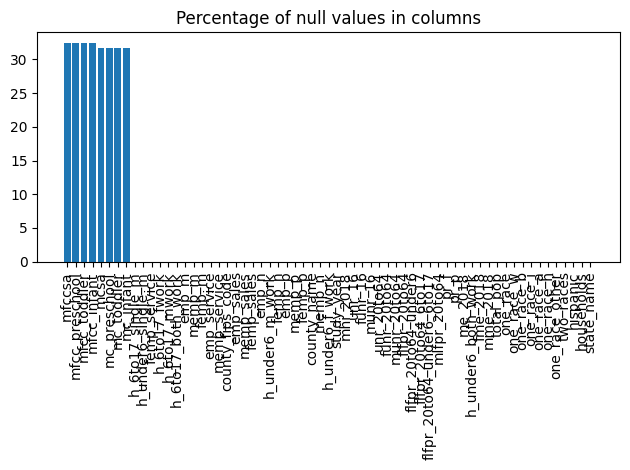

mfccsa               32.4
mfcc_preschool       32.4
mfcc_toddler         32.4
mfcc_infant          32.4
mcsa                 31.7
mc_preschool         31.7
mc_toddler           31.7
mc_infant            31.7
h_6to17_single_m      0.0
h_under6_single_m     0.0
femp_service          0.0
dtype: float64

In [134]:
#Overview of null values:

# Check for missing values
null_data = round(df_costs.isna().sum().sort_values(ascending = False)/df_costs.shape[0]*100, 1)
plt.bar(null_data.index, null_data.values)
plt.title('Percentage of null values in columns')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

null_data[0:11]

We have 8 columns with around 31% NaN values each one, that columns are related to median prices charged for childcare (thats the core of our analysis), so we will drop that data with NaNs.

In [135]:
#Drop NaN data
shape = df_costs.shape[0]
df_costs = df_costs.dropna()
print("Rows eliminated:", shape - df_costs.shape[0])

Rows eliminated: 11225


## Bivariate analysis

### Correlation

Correlation analysis in a nutshell:

If two features are closely or completely correlated (or inverse correlated), an increase in one results in an increase in the other (a decrease in one will increase the other in case of inverse correlation). This implies that both features carry very similar (or inverse) information, with little to no variation. This phenomenon is known as MultiColinearity, as both features essentially convey the same information. therefore we need eliminate redundant information from our data, for saving space in memory, faster training in models, avoiding bias in modeling, etc.

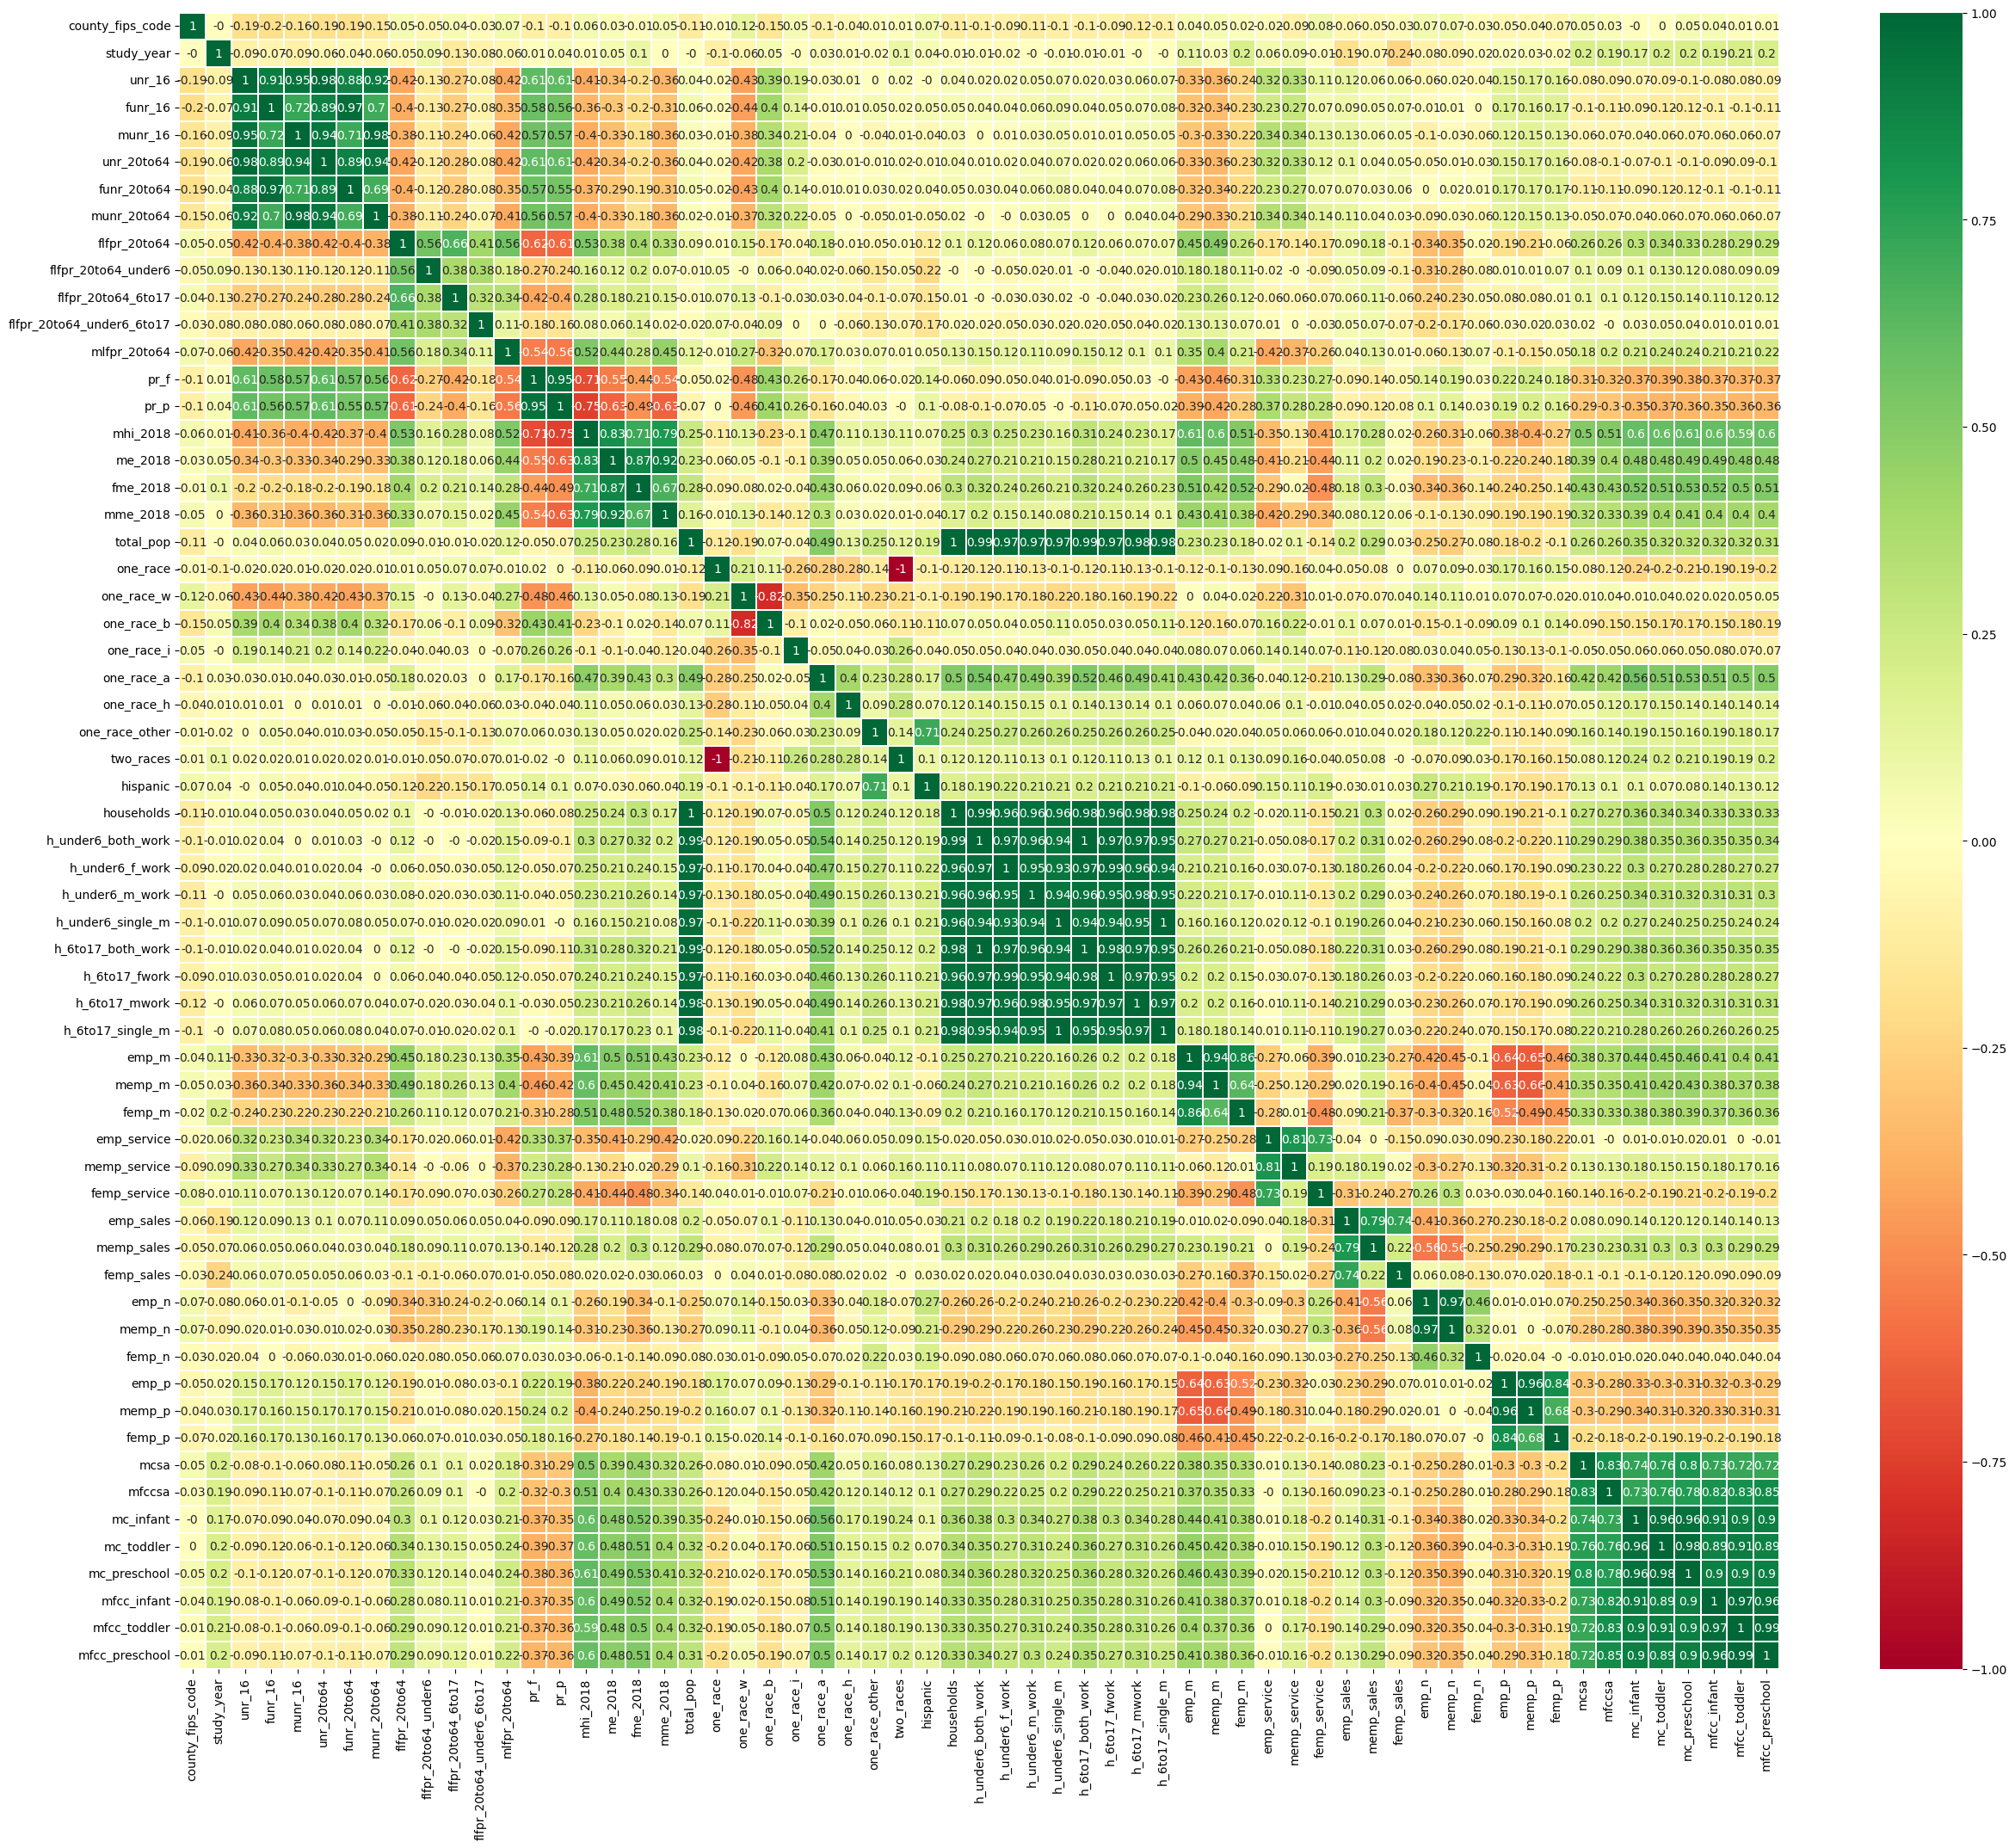

In [136]:
#Correlation heatmap
plt.figure(figsize=(30,25))
sns.heatmap(round(df_costs.drop(['county_name', 'state_name'], axis = 1).corr(),2), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.xticks(rotation=90) # Rotates X-Axis Ticks by 90-degrees
plt.yticks(rotation=0) # Rotates Y-Axis Ticks
plt.show()

### Interesting relationships:

- % of civilians in service jobs has an inverse relationship with mean household income (-35%) and labor force participation (-42%), and a positive relationship with the poverty rate (+33%).
- % of civilians in sales/office-related jobs has a proportional relationship with mean household income (+17%), but a +28% relationship with males and +2% for females.

- Childcare costs are highly positively correlated with:
    - median incomes (+50%)
    - Labor force participation (+18% for males, +26% for females)
    - % of civilians in managment, science, art and business occupations (+38%)
    - % of male civilians in sales and office jobs (+23%), but for females, it's -10%
    
* Childcare costs are highly negatively correlated with:
    - Poverty rate for families (-31%)
    - % of civilians employed in natural resources, construction, and mantenance occupations (-25%), (for males -28%, for females -1%).
    - % of civilians employed in transportation, production and material moving (-30%)

* The racial composition of a county (white, black, native) has a significant relationship with poverty, income, unemployment, and job type.

### To handle multicollinearity issues in regression/classification modeling, we can choose to:

- Filter out highly correlated variables to avoid multicollinearity issues (above 80% of positive or negative correlation).
- Use regularization methods (i.e., L1 or L2 regularization, Dropout, data augmentation, etc.)
- Use dimensionality reduction techniques (i.e., PCA, Factor Analysis, Linear Discriminant Analysis, etc.)

By now, we will not transform any data, that is for future analysis.

## Explore categorical vs numerical data

Now let's transform numeric data into categorical binned data, for EDA purposes, our main question is:

- How is the distribution behaviour with high, medium and low levels for each variable?

In [138]:
#Create new categorical columns
descriptive = df_costs.describe()
def to_categorical(column, descriptive):
    bins = [-np.inf, descriptive.loc['25%', column], descriptive.loc['50%', column], descriptive.loc['75%', column], np.inf]
    if len(set(bins)) == len(bins): #Check if our bins have repeated values. 
        return pd.cut(
                df_costs[column], 
                bins=bins, 
                labels=['p0-p25', 'p25-p50', 'p50-p75', 'p75-p100'], 
                ordered=False,
                )
    else: #If our bins have repeated values, create bins by the range of our column
        return pd.cut(
                df_costs[column], 
                bins=3, 
                labels=['low', 'mid', 'high'], 
                ordered=False,
                )
        

numeric_options = ['unr_16', 'funr_16', 'munr_16',
       'unr_20to64', 'funr_20to64', 'munr_20to64', 'flfpr_20to64',
       'flfpr_20to64_under6', 'flfpr_20to64_6to17',
       'flfpr_20to64_under6_6to17', 'mlfpr_20to64', 'pr_f', 'pr_p', 'mhi_2018',
       'me_2018', 'fme_2018', 'mme_2018', 'total_pop', 'one_race',
       'one_race_w', 'one_race_b', 'one_race_i', 'one_race_a', 'one_race_h',
       'one_race_other', 'two_races', 'hispanic', 'households',
       'h_under6_both_work', 'h_under6_f_work', 'h_under6_m_work',
       'h_under6_single_m', 'h_6to17_both_work', 'h_6to17_fwork',
       'h_6to17_mwork', 'h_6to17_single_m', 'emp_m', 'memp_m', 'femp_m',
       'emp_service', 'memp_service', 'femp_service', 'emp_sales',
       'memp_sales', 'femp_sales', 'emp_n', 'memp_n', 'femp_n', 'emp_p',
       'memp_p', 'femp_p', 'mcsa', 'mfccsa', 'mc_infant', 'mc_toddler',
       'mc_preschool', 'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool']

for column in numeric_options:
    df_costs['cat_' + column] = to_categorical(column=column, descriptive=descriptive)

category_options = ['cat_' + i for i in numeric_options]

### Multivariate visualization

The following plots can show us the behaviour of this combination of variables:

- Numerical variable (for histogram)
- Categorical variable (for x-axis bins)
- Optional categorical variable (for hue in each x-axis bins)

If you just want to plot the numerical variable against one categorical variable, you simply need to set variable3 to the "None" option.

This allows us to understand interactions between variables in a graphical way!

### Scatter plot

Let's check bivariate relationships with a scatter plot widget:

In [157]:
#Box and whiskers plot for checking outliers:

def scatter(variable1, variable2, variable3):
    plt.figure(figsize=(5,4))
    if variable3 != 'None':
        sns.jointplot(data=df_costs, x=variable1, y=variable2, hue = variable3)
        print("", costs_dict[costs_dict['variable'] == variable1]['description'].values[0], "\n\n VS\n",
               costs_dict[costs_dict['variable'] == variable2.replace('cat_','')]['description'].values[0],
              "\n\n BY:\n", 
              costs_dict[costs_dict['variable'] == variable3.replace('cat_','')]['description'].values[0])
        plt.show()
    else:
        sns.jointplot(data=df_costs, x=variable1, y=variable2, kind="reg")
        print("", costs_dict[costs_dict['variable'] == variable1]['description'].values[0], "\n VS\n",
               costs_dict[costs_dict['variable'] == variable2.replace('cat_','')]['description'].values[0])
        plt.show()

# widget
variable1_widget = widgets.Dropdown(options=numeric_options, value = 'unr_16')
variable2_widget = widgets.Dropdown(options=numeric_options, value = 'mhi_2018')
variable3_widget = widgets.Dropdown(options=['None'] + category_options, value = 'cat_emp_m')

# update plot with another column
widgets.interactive(scatter, variable1=variable1_widget, variable2=variable2_widget, variable3=variable3_widget)

interactive(children=(Dropdown(description='variable1', options=('unr_16', 'funr_16', 'munr_16', 'unr_20to64',…

In [149]:
#Create violin plot for checking categorical behaviour

def violinplot(variable1, variable2, variable3):
    plt.figure(figsize=(10,6))
    if variable3 != 'None':
        sns.violinplot(data=df_costs, y=variable1, x=variable2, hue = variable3, split=False, inner="quart")
        print("", costs_dict[costs_dict['variable'] == variable1]['description'].values[0], "\n\n VS\n",
               costs_dict[costs_dict['variable'] == variable2.replace('cat_','')]['description'].values[0],
              "\n\n BY:\n", 
              costs_dict[costs_dict['variable'] == variable3.replace('cat_','')]['description'].values[0])
        plt.show()
    else:
        sns.violinplot(data=df_costs, y=variable1, x=variable2, inner="quart")
        print("", costs_dict[costs_dict['variable'] == variable1]['description'].values[0], "\n VS\n",
               costs_dict[costs_dict['variable'] == variable2.replace('cat_','')]['description'].values[0])
        plt.show()

# widget
variable1_widget = widgets.Dropdown(options=numeric_options, value = 'mcsa')
variable2_widget = widgets.Dropdown(options=category_options, value = 'cat_hispanic')
variable3_widget = widgets.Dropdown(options=['None'] + category_options, value = 'cat_pr_f')

# update plot with another column
widgets.interactive(violinplot, variable1=variable1_widget, variable2=variable2_widget, variable3=variable3_widget)

interactive(children=(Dropdown(description='variable1', index=51, options=('unr_16', 'funr_16', 'munr_16', 'un…

# Conclusions

## What we did?

* Data check and cleaning: Cleaning the data have improved the quality of our dataset by checking our data quality and handling missing values. This is crucial for obtaining accurate and reliable results in any subsequent analysis.

* Univariate analysis: We had numeric columns, so we did a dispersion analysis, for checking outliers and possible data errors.

* Bivariate analysis: Looking for relationships between variables we did the folowing analysis:

    - Creation of Categorical Columns Based on Percentiles of Numerical Columns: This would have allowed for a more intuitive interpretation of the numerical variables by grouping them into categories based on their distribution. This can also help reveal patterns that are not apparent when considering the raw numerical values.

    - Correlation Analysis: We found strongly correlated variables that could indicate redundancy in our dataset, while weak correlations could suggest more complex relationships that could be further explored.

    - Violin Plots with Categorical HUE: The violin plots have provided a detailed view of the distribution of our variables, with the added advantage of the categorical hue showing how these distributions differ between categories. This revealed key differences between groups.

    - Joinplots with Categorical HUE: The joinplots have provided a joint view of two variables, allowing us to see both the relationship between them (through the scatter plot) and their individual distributions (through the histograms). The categorical hue adds another dimension to this analysis, allowing us to see how these relationships may change between different categories.


## Next steps?

- We can perform an in-depth analysis of the relationships between variables by conducting T-tests, ANOVAs, simple regressions, etc.
- We can check for homoscedasticity in our variables with the Breusch-Pagan test, White test, or by creating a plot of Fitted Values vs. Residuals. 
- We can also determine the type of distribution followed by our data using the Kolmogorov-Smirnov test, Chi-Square test, Jarque-Bera Tests, etc.

With this data, we can carry out descriptive-predictive analyses on any of the variables in our dataset. We just need to set an objective like:

- "Predict the median household income"
- "Clustering counties by selecting variables"
- "Predict the childcare costs for a county"

The steps required for each analysis will be different, and our data transformation too! But that's not our current objective.

Thanks for reading!
